In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.io_utils import *
from src.metrics import *
from src.viz import *

df = read_data("data/ecommerce_sales.csv")

df_clean = clean_data(df)

print("---" * 50)
print()
print("Here is a sample of our data:")
print()
print(df_clean.sample(3))
print()
print("---" * 50)

------------------------------------------------------------------------------------------------------------------------------------------------------

Here is a sample of our data:

      order_id       date       city category   price  units  revenue
1868    101868 2024-05-27  Stockholm     Home  545.42      4  2181.68
1725    101725 2024-04-29      Malmö     Toys   50.00      4   200.00
938     100938 2024-05-17      Malmö     Home  430.29      3  1290.87

------------------------------------------------------------------------------------------------------------------------------------------------------


## Total revenue, total units sold, average order value

In [2]:
print("---" * 50)
print()
print(f"In the first 6 months of 2024 we sold a total of {total_units(df_clean)} units.\n"
      f"The total revenue is {total_revenue(df_clean)} sek and the average order value is {average_order(df_clean)} sek.")
print()
print("---" * 50)

------------------------------------------------------------------------------------------------------------------------------------------------------

In the first 6 months of 2024 we sold a total of 7463 units.
The total revenue is 3502767.23 sek and the average order value is 1401.11 sek.

------------------------------------------------------------------------------------------------------------------------------------------------------


## Revenue per category

------------------------------------------------------------------------------------------------------------------------------------------------------

The top 3 categories per revenue are:
      category  tot_rev_cat
0  Electronics   1364228.07
1       Sports    734653.42
2     Clothing    586744.91

------------------------------------------------------------------------------------------------------------------------------------------------------


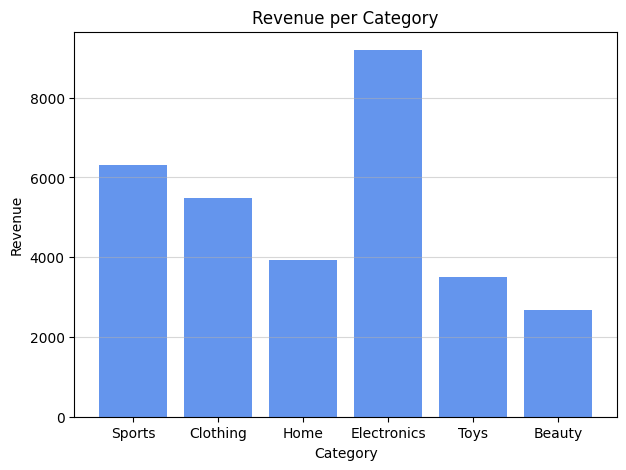

In [3]:
print("---" * 50)
print()
print(f"The top 3 categories per revenue are:\n"
      f"{revenue_per_category(df_clean).head(3)}")

fig, ax = plt.subplots(figsize=(7,5))
bar(ax, df_clean["category"], df_clean["revenue"], "Revenue per Category", "Category", "Revenue", color="#6495ED")
plt.savefig("images/fig_rev_per_cat.png", dpi=200)
print()
print("---" * 50)

## Revenue per city

------------------------------------------------------------------------------------------------------------------------------------------------------

The top 3 cities per revenue are:
        city  tot_rev_city
0  Stockholm    1227201.94
1   Göteborg     859019.65
2      Malmö     567926.32.

------------------------------------------------------------------------------------------------------------------------------------------------------


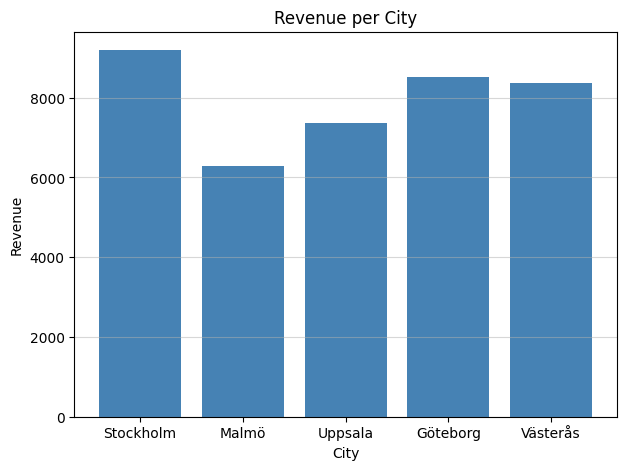

In [4]:
print("---" * 50)
print()
print(f"The top 3 cities per revenue are:\n"
      f"{revenue_per_city(df_clean).head(3)}.")

fig, ax = plt.subplots(figsize=(7,5))
bar(ax, df_clean["city"], df_clean["revenue"], "Revenue per City", "City", "Revenue", color="#4682B4")
plt.savefig("images/fig_rev_per_cit.png", dpi=200)
print()
print("---" * 50)

## Revenue per month

     month  rev_per_month
0  2024-01      664083.32
1  2024-02      548462.03
2  2024-03      487602.00
3  2024-04      580194.83
4  2024-05      632165.16
5  2024-06      590259.89


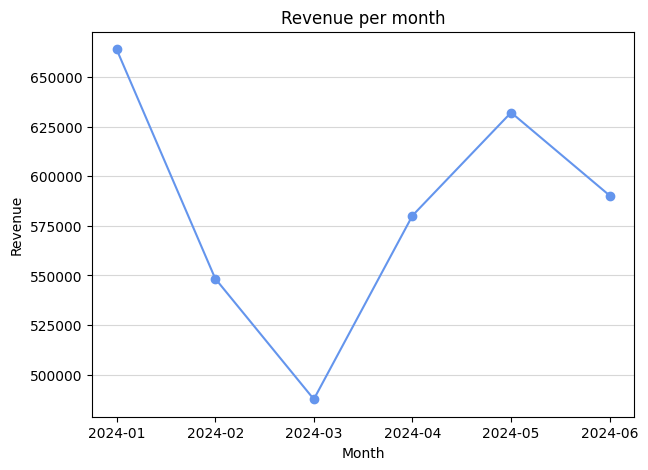

In [5]:
df_monthly_revenue = revenue_per_month(df_clean)
print (revenue_per_month(df_clean))

fig, ax = plt.subplots(figsize=(7,5))
line(ax, df_monthly_revenue["month"], df_monthly_revenue["rev_per_month"],"Revenue per month", "Month", "Revenue")
plt.savefig("images/fig_rev_per_month.png", dpi=200)

In [6]:
piv = pd.pivot_table(
    df_clean,
    index="city",
    columns="category",
    values="order_id",
    aggfunc="nunique",
    fill_value=0,
    margins=True)

piv.to_csv("data/pivot_city_x_category.csv")
piv.head()

category,Beauty,Clothing,Electronics,Home,Sports,Toys,All
city,,,,,,,
Göteborg,56,104,145,136,91,54,586
Malmö,31,69,104,83,70,39,396
Stockholm,86,181,220,163,169,80,899
Uppsala,37,86,101,65,56,36,381
Västerås,31,69,48,43,29,18,238


Orders with 1-5 units make up the majority. Some orders with few units generate high revenue (probably expensive items).
Larger orders (6-9 units) tend to have a wide range of revenue but are less frequent.
No strict linear relationship.


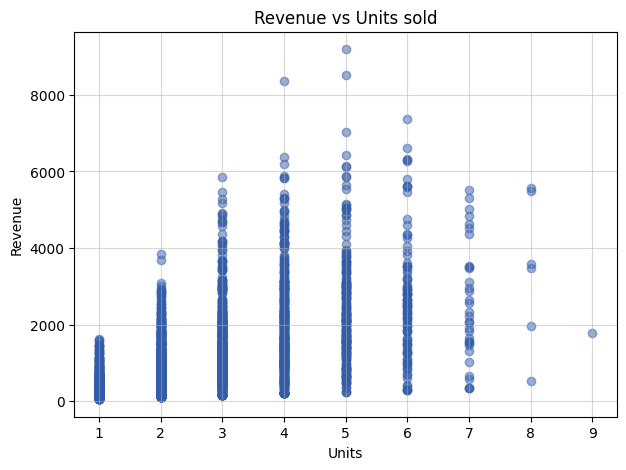

In [7]:
# Revenue vs Units
fig, ax = plt.subplots(figsize=(7,5))
scatter(ax, df_clean["units"], df_clean["revenue"],"Revenue vs Units sold", "Units", "Revenue")
plt.savefig("images/fig_rev_per_units.png", dpi=200)

print("Orders with 1-5 units make up the majority. Some orders with few units generate high revenue (probably expensive items).\n"
      "Larger orders (6-9 units) tend to have a wide range of revenue but are less frequent.\n"
      "No strict linear relationship.")

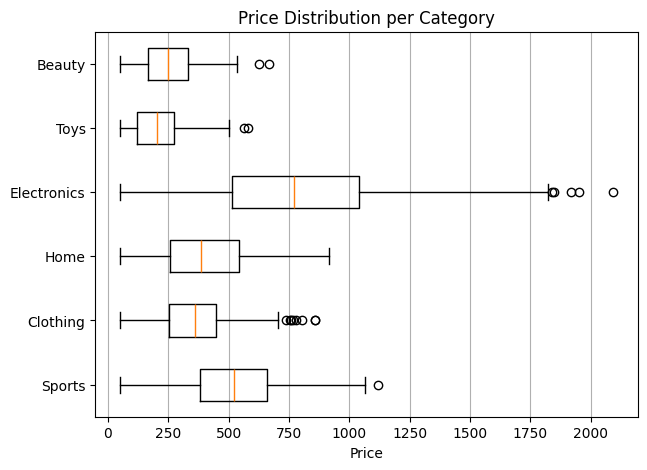

In [8]:
# Price Distribution per Category
categories = df_clean['category'].unique()

price_data = [df_clean[df_clean['category'] == cat]['price'] for cat in categories]

fig, ax = plt.subplots(figsize=(7,5))
box_p(ax, price_data, categories, "Price Distribution per Category", "Price")
plt.savefig("images/fig_price_distrib.png", dpi=200)

## Recommendations:
- High sales in Electronics and Sports.
- Support the teams in Stockholm and Göteborg in January and May.
- Given the wide range of Electronics, I recommend to organize the products by price tier (budget, midrange, premium)